In [1]:
import gymnasium as gym
from src.basic_agent import BasicAgent
import matplotlib.pyplot as plt
import numpy as np

In [2]:

env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()
weak_agent = BasicAgent(print_mode=True)
action = weak_agent.start_step()
total_steps = 5000
for _ in range(total_steps):
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        reward = weak_agent.terminal_step(observation, reward)
        observation, info = env.reset()
        action = weak_agent.start_step()
    else:
        action, reward = weak_agent.step(observation, reward)
env.close()

Crash: vy=0.132706880569458, l1=0.0, l2=0.0
Safe: vy=1.3199652038053955e-08, l1=1.0, l2=1.0
Landed in goal as well
Crash: vy=-1.6295521259307861, l1=0.0, l2=0.0
Safe: vy=-0.004096867050975561, l1=1.0, l2=1.0
Landed in goal as well
hs_bl: vy=-0.29714804887771606, l1=1.0, l2=1.0
hs_1l: vy=-0.31399044394493103, l1=1.0, l2=0.0
hs_1l: vy=-0.5076450109481812, l1=1.0, l2=0.0
Crash: vy=-0.6569217443466187, l1=0.0, l2=1.0
Crash: vy=0.06963661313056946, l1=0.0, l2=0.0
Crash: vy=-0.9628393054008484, l1=1.0, l2=0.0
Crash: vy=-1.3319175243377686, l1=0.0, l2=0.0
Crash: vy=-0.45140570402145386, l1=0.0, l2=0.0
hs_1l: vy=-0.5159346461296082, l1=1.0, l2=0.0
Crash: vy=0.25481000542640686, l1=0.0, l2=0.0
Crash: vy=-0.613247275352478, l1=0.0, l2=1.0
Crash: vy=-1.3688619136810303, l1=0.0, l2=0.0
ls_1l: vy=0.03385017067193985, l1=0.0, l2=1.0
Crash: vy=-0.9731219410896301, l1=1.0, l2=0.0
hs_1l: vy=-0.29837697744369507, l1=0.0, l2=1.0
Crash: vy=-0.8056660294532776, l1=1.0, l2=1.0
Crash: vy=0.11104925721883774,

Percent Done: 5.0%
Percent Done: 10.0%
Percent Done: 15.0%
Percent Done: 20.0%
Percent Done: 25.0%
Percent Done: 30.0%
Percent Done: 35.0%
Percent Done: 40.0%
Percent Done: 45.0%
Percent Done: 50.0%
Percent Done: 55.0%
Percent Done: 60.0%
Percent Done: 65.0%
Percent Done: 70.0%
Percent Done: 75.0%
Percent Done: 80.0%
Percent Done: 85.0%
Percent Done: 90.0%
Percent Done: 95.0%
Percent Done: 100.0%


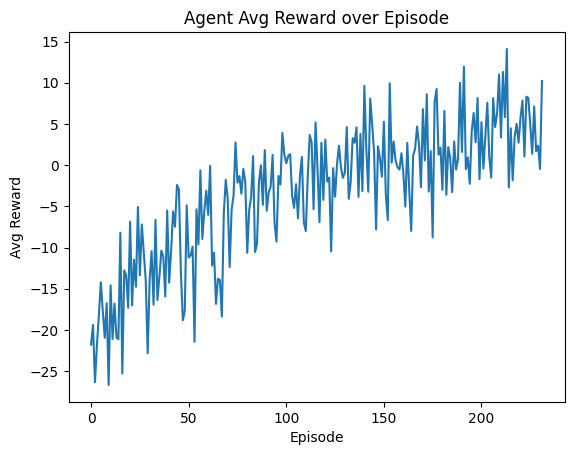

In [3]:

env = gym.make("LunarLander-v2")
observation, info = env.reset()
agent1 = BasicAgent(print_mode=False)
action = agent1.start_step()
reward_hist = []
batch_hist = []
total_reward = 0
batch_reward = 0
ep_steps = 0
batch = 50
total_steps = 1500000
print_fac = 20
print_interval = int(total_steps/print_fac)
for _ in range(total_steps):
    if (_+1) % print_interval == 0:
        percent_done = (_+1)/total_steps*100
        print(f"Percent Done: {percent_done:.1f}%")
    observation, reward, terminated, truncated, info = env.step(action)
    ep_steps += 1
    if terminated or truncated:
        reward = agent1.terminal_step(observation, reward)
        total_reward += reward
        reward_hist.append(total_reward/ep_steps)
        total_reward = 0
        ep_steps = 0
        observation, info = env.reset()
        action = agent1.start_step()
    else:
        action, reward = agent1.step(observation, reward)
        total_reward += reward
env.close()

# Group Episodes into batches to average out performance
bval = 0
b_iter = 1
for val in reward_hist:
    b_iter += 1
    if (b_iter % batch) != 0:
        bval += val
    else:
        bval = bval/batch
        batch_hist.append(bval)
        bval = 0
plt.plot(batch_hist)
plt.title("Agent Avg Reward over Episode")
plt.xlabel("Episode")
plt.ylabel("Avg Reward")
plt.show()

In [4]:
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()
agent1.toggle_print()
action = agent1.start_step()
total_steps = 5000
for _ in range(total_steps):
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        agent1.terminal_step(observation, reward)
        observation, info = env.reset()
        action = agent1.policy(observation)
    else:
        action = agent1.policy(observation)
env.close()
agent1.toggle_print()

hs_1l: vy=-0.5425792932510376, l1=1.0, l2=0.0
Crash: vy=-1.1400244235992432, l1=0.0, l2=0.0
Crash: vy=-0.8233144879341125, l1=1.0, l2=1.0
Crash: vy=-0.6085743308067322, l1=0.0, l2=1.0
hs_1l: vy=-0.27744588255882263, l1=1.0, l2=0.0
Crash: vy=-1.3000545501708984, l1=0.0, l2=0.0
hs_bl: vy=-0.46459710597991943, l1=1.0, l2=1.0
Crash: vy=0.13087356090545654, l1=0.0, l2=0.0
Safe: vy=-0.12199795246124268, l1=1.0, l2=1.0
Safe: vy=0.018903298303484917, l1=1.0, l2=1.0
Crash: vy=-1.268868327140808, l1=0.0, l2=0.0
Safe: vy=-0.00515831308439374, l1=1.0, l2=1.0
hs_bl: vy=-0.44228193163871765, l1=1.0, l2=1.0
Safe: vy=-0.1069483757019043, l1=1.0, l2=1.0
hs_bl: vy=-0.5349336862564087, l1=1.0, l2=1.0
ls_1l: vy=-0.019925598055124283, l1=0.0, l2=1.0
Safe: vy=-0.19725081324577332, l1=1.0, l2=1.0
Landed in goal as well
ls_1l: vy=0.029008774086833, l1=1.0, l2=0.0
Safe: vy=-0.15917803347110748, l1=1.0, l2=1.0
Crash: vy=-0.8646358251571655, l1=1.0, l2=1.0
Crash: vy=0.07490094751119614, l1=1.0, l2=0.0
ls_1l: vy=